In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Create a data frame where the label is Name
df = pd.read_csv('valorant-stats.csv', sep=',', index_col='Name')
#
df['Wall Penetration'] = df['Wall Penetration'].replace(['Low', 'Medium', 'High', 'aaa'], [1, 2, 3, 4])
df.describe().loc[['mean', 'std']].style.format("{:.2f}")

,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
mean,1629.41,7.46,1.94,21.24,114.00,43.59,36.41,107.76,41.47,34.59,101.71,39.24,32.71
std,1232.76,4.78,0.75,23.82,63.30,34.48,29.01,67.10,35.71,30.10,69.68,36.71,30.88


In [12]:
display(df.head(5))

,Weapon Type,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
Name,,,,,,,,,,,,,,
Classic,Sidearm,0,6.75,1,12,78,26,22,78,26,22,66,22,18
Shorty,Sidearm,200,3.30,1,2,36,12,10,24,8,6,9,3,2
Frenzy,Sidearm,400,10.00,1,13,78,26,22,63,21,17,63,21,17
Ghost,Sidearm,500,6.75,2,15,105,33,26,88,25,21,88,25,21
Sheriff,Sidearm,800,4.00,3,6,160,55,47,160,55,47,145,50,43


In [6]:
from sklearn.decomposition import PCA

# the final number of components we want to keep
n_components = 2
# seed
random_state = 9527

# create a class called pca
pca = PCA(n_components=n_components, random_state=random_state)


In [13]:
from sklearn.preprocessing import StandardScaler

# get all the attributes except Name & Weapon
X = df.iloc[: , 2:]

# create a class called scaler
scaler = StandardScaler()
# Standardization
Z = scaler.fit_transform(X)

# replace raw data using standardized data
df.iloc[: , 2:] = Z

display(df.head(5))

D:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

,Weapon Type,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
Name,,,,,,,,,,,,,,
Classic,Sidearm,0,-0.153876,-1.297771,-0.399583,-0.586261,-0.525741,-0.512059,-0.457250,-0.446573,-0.431086,-0.528181,-0.484003,-0.490878
Shorty,Sidearm,200,-0.897882,-1.297771,-0.832252,-1.270233,-0.944223,-0.938427,-1.286807,-0.966160,-0.979007,-1.371357,-1.017563,-1.024953
Frenzy,Sidearm,400,0.547000,-1.297771,-0.356316,-0.586261,-0.525741,-0.512059,-0.687683,-0.590903,-0.602311,-0.572559,-0.512086,-0.524258
Ghost,Sidearm,500,-0.153876,0.081111,-0.269782,-0.146565,-0.316499,-0.369937,-0.303629,-0.475439,-0.465331,-0.202745,-0.399757,-0.390739
Sheriff,Sidearm,800,-0.746924,1.459993,-0.659185,0.749112,0.341116,0.376207,0.802447,0.390539,0.425042,0.640431,0.302296,0.343614


In [14]:
df.describe().loc[['mean', 'std']].style.format("{:.2f}")

,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
mean,1629.41,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00
std,1232.76,1.03,1.03,1.03,1.03,1.03,1.03,1.03,1.03,1.03,1.03,1.03,1.03


In [ ]:
L = pca.fit_transform(Z)
pca.fit_transform(Z)

array([[-1.63690893, -1.01684916],
       [-3.23027116, -1.80248938],
       [-1.9474307 , -0.64804253],
       [-0.94886946, -0.23213267],
       [ 1.81139895, -0.0576204 ],
       [-2.08471123,  0.42040198],
       [-1.76709894,  0.89319147],
       [-0.26657717,  0.35602972],
       [ 2.49555437, -0.15409342],
       [ 0.01511683,  0.80679648],
       [ 0.52829229,  0.50523391],
       [ 5.01106674, -1.0268278 ],
       [ 8.87999689, -0.46698311],
       [-2.4842182 , -1.94522259],
       [-2.60556802, -0.98397068],
       [-1.12113517,  1.78153075],
       [-0.64863711,  3.57104742]])

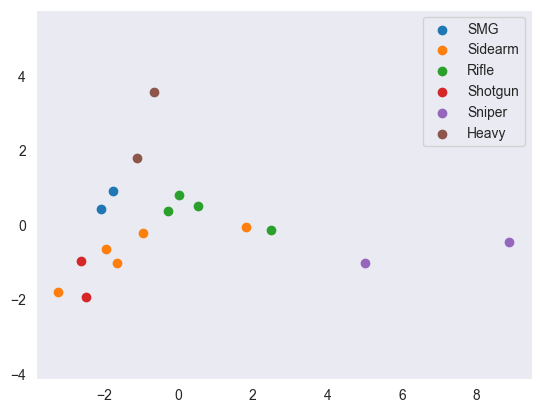

In [ ]:
# draw a scatter plot to show the result
label = list(set(df['Weapon Type']))
for i in label:
    plt.scatter(L[df['Weapon Type']==i, 0],  L[df['Weapon Type']==i, 1], label=i)
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()

In [23]:
pca.components_

array([[-0.1392335 ,  0.18211768, -0.05471265,  0.31421882,  0.3284128 ,
         0.32723952,  0.31524844,  0.32921119,  0.32850457,  0.31446546,
         0.32904958,  0.32854311],
       [ 0.50557012,  0.47111612,  0.7116893 ,  0.04872521, -0.03295983,
        -0.0323382 ,  0.07711855, -0.01342143, -0.01037131,  0.0696456 ,
        -0.01296508, -0.01367389]])

In [24]:
pcs = np.array(pca.components_)

df_pc = pd.DataFrame(pcs, columns=df.columns[2:])
df_pc.index = [f'第{c}主成分' for c in [1, 2]]
df_pc.style.background_gradient(cmap='Greys_r', axis=None).format('{:.2}')

,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
第1主成分,-0.14,0.18,-0.055,0.31,0.33,0.33,0.32,0.33,0.33,0.31,0.33,0.33
第2主成分,0.51,0.47,0.71,0.049,-0.033,-0.032,0.077,-0.013,-0.01,0.07,-0.013,-0.014


In [ ]:
# Fire Rate is the most important information stored in PC1
# Magazine Capacity is the most important information stored in PC2
